In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
%matplotlib inline

In [17]:
sizes = [50, 50, 50]

# assortative
probs = [[0.25, 0.02, 0.02],
        [0.02, 0.25, 0.02],
        [0.02, 0.02, 0.25]]

# probs = [[0.25, 0.05, 0.02],
#         [0.05, 0.35, 0.07],
#         [0.02, 0.07, 0.40]]

# disassortative
# probs = [[0.01, 0.1, 0.1],[0.1, 0.01, 0.1],[0.1, 0.1, 0.01]]
# probs = [[0.01, 0.1, 0.2],
#          [0.1, 0.01, 0.4],
#          [0.2, 0.4, 0.01]]

G = nx.stochastic_block_model(sizes, probs, seed=10)
print(G.number_of_nodes(),G.number_of_edges())

150 1018


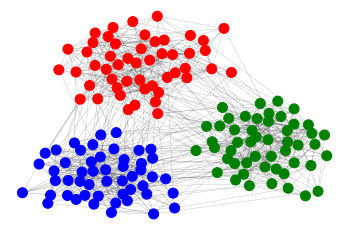

In [18]:
pos=nx.spring_layout(G, iterations=200)

colors={0:'b',1:'r',2:'g',4:'black',5:'magenta'}
node_colors=[]
c=0
for s in sizes:
    node_colors.extend([colors[c] for i in range(s)])
    c+=1
    
nx.draw_networkx_nodes(G,pos=pos,node_size=100,node_color=node_colors)
nx.draw_networkx_edges(G,pos=pos,width=0.1)

plt.axis('off')
plt.show()

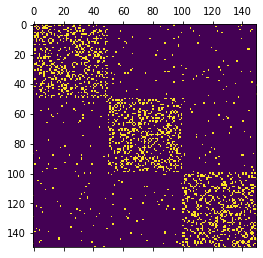

In [20]:
B = nx.to_numpy_matrix(G)
plt.matshow(B)
#plt.colorbar()
plt.show()

### Generative model

In [30]:
K = 3
N = 100
gamma = np.array([0.1,0.2,0.9]) # prior on the group membership


#### Generate group membership

In [31]:
q0 = np.random.multinomial(1, gamma, size=N) # one-hot vector
q = np.argmax(q0,axis=1)
q[:10]

array([2, 2, 2, 2, 2, 1, 0, 2, 2, 2])

In [40]:
# assortative
# C = [[0.25, 0.02, 0.02],
#         [0.02, 0.25, 0.02],
#         [0.02, 0.02, 0.25]]

# probs = [[0.25, 0.05, 0.02],
#         [0.05, 0.35, 0.07],
#         [0.02, 0.07, 0.40]]

# disassortative
# C = [[0.01, 0.1, 0.1],[0.1, 0.01, 0.1],[0.1, 0.1, 0.01]]
C = [[0.01, 0.1, 0.2],
         [0.1, 0.01, 0.4],
         [0.2, 0.4, 0.01]]

#### Evaluate parameter of the Bernoulli

In [41]:
M = (q0.dot(C)).dot(q0.T)

#### Sample network adjacency matrix

In [42]:
A = np.random.binomial(1,M)

<Figure size 432x288 with 0 Axes>

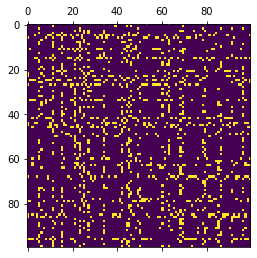

In [43]:
plt.figure()
plt.matshow(A)

#### Sort by group

In [44]:
nodelist = list(np.where(q == 0)[0])
for k in range(1,K):
    nodelist.extend(list(np.where(q == k)[0]))

<Figure size 432x288 with 0 Axes>

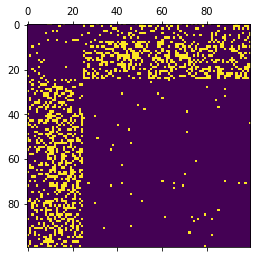

In [45]:
plt.figure()
plt.matshow(A[nodelist][:,nodelist])